<a href="https://colab.research.google.com/github/sahil301290/Deep-Learning/blob/master/Shakespeare_BiLSTM_Predictionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()
#print(data)

--2022-02-07 13:25:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-02-07 13:25:59 (97.9 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
corpus = data.lower().split("\n")
print(corpus)

['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou, contracted to thine own bright eyes,', "feed'st thy light'st flame with self-substantial fuel,", 'making a famine where abundance lies,', 'thyself thy foe, to thy sweet self too cruel.', "thou that art now the world's fresh ornament", 'and only herald to the gaudy spring,', 'within thine own bud buriest thy content', 'and, tender churl, makest waste in niggarding.', 'pity the world, or else this glutton be,', "to eat the world's due, by the grave and thee.", 'when forty winters shall beseige thy brow,', "and dig deep trenches in thy beauty's field,", "thy youth's proud livery, so gazed on now,", "will be a tatter'd weed, of small worth held:", "then being ask'd where all thy beauty lies,", 'where all the treasure of thy lusty days,', 'to say, within thine own deep-sunken eyes,', 'were an all-eating

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

3211


In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
	#print(token_list)

In [6]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)
print(max_sequence_len)

[[   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 [   0    0    0 ...  417  877  166]
 ...
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]
 [   0    0    0 ... 3210   15   14]]
11


In [7]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)
print(label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.25))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 256)          234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1605)              207045    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [9]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 30s 31ms/step - loss: 6.9226 - accuracy: 0.0206 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
484/484 [==============================] - 13s 28ms/step - loss: 6.5055 - accuracy: 0.0220 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
484/484 [==============================] - 13s 26ms/step - loss: 6.4057 - accuracy: 0.0247 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/100
484/484 [==============================] - 13s 26ms/step - loss: 6.2792 - accuracy: 0.0290 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1845 - accuracy: 0.0343 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1014 - accuracy: 0.0380 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0295 - accuracy: 0.0410 - precisi

In [10]:
history.history??

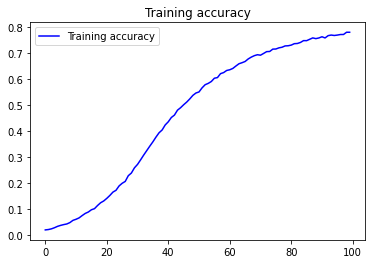

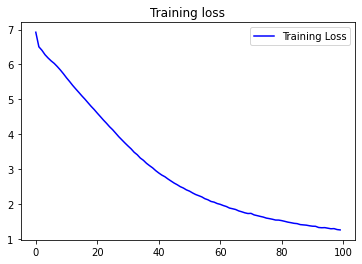

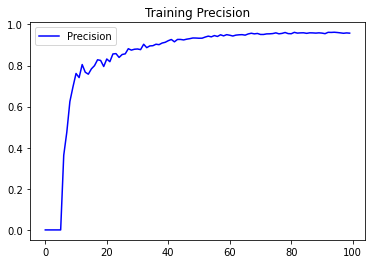

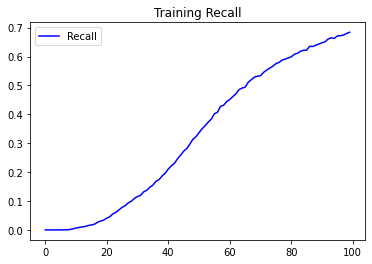

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
prec = history.history['precision']
rcl = history.history['recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Precision')
plt.title('Training Precision')
plt.legend()
plt.show()

plt.plot(epochs, rcl, 'b', label='Recall')
plt.title('Training Recall')
plt.legend()
plt.show()

In [12]:
seed_text = "Et tu Brute, then die Caeser"
next_words = 100
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	#predicted = model.predict_classes(token_list, verbose=0)
	predicted=model.predict(token_list)
	predicted=np.argmax(predicted,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Et tu Brute, then die Caeser for love knows it shall not live so dumb dear head sight make me mind twain grow even rare young old life or not bright you find thee so loss her more brow show all long much days brought to show before thy absence out a point well skill a brow brow brow sit brought young me young to make them ever for me her young die die die still room taken latch latch slain slain place bad thence her fresh doom and lies out out good fashion torn not taken deem'd twain twain near latch cross 'will ' chase
